In [1]:
import pandas as pd
dataset = pd.read_csv('Live.csv')
dataset.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0.0,0.0,1.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0.0,0.0,1.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0


In [2]:
dataset.shape

(7050, 13)

In [3]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)

In [4]:
model.fit(dataset)

KMeans(n_clusters=3)

In [5]:
labels = model.predict(dataset)

In [6]:
import numpy as np
np.unique(labels, return_counts=True)

(array([0, 1, 2]), array([2334, 4288,  428], dtype=int64))

In [7]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [11]:
silhouettes = []
ks = list(range(2, 12))

In [12]:
for n_cluster in ks:
    kmeans = KMeans(n_clusters=n_cluster).fit(dataset)
    label = kmeans.labels_
    sil_coeff = silhouette_score(dataset, label, metric='euclidean')
    print(f'For n_cluster={n_cluster}, The Silhouette Coefficient is {sil_coeff}')
    silhouettes.append(sil_coeff)

For n_cluster=2, The Silhouette Coefficient is 0.8188237721696818
For n_cluster=3, The Silhouette Coefficient is 0.8972493682244883
For n_cluster=4, The Silhouette Coefficient is 0.9106664962327086
For n_cluster=5, The Silhouette Coefficient is 0.8866768371183749
For n_cluster=6, The Silhouette Coefficient is 0.843011828891579
For n_cluster=7, The Silhouette Coefficient is 0.8419421782294251
For n_cluster=8, The Silhouette Coefficient is 0.7670268341187625
For n_cluster=9, The Silhouette Coefficient is 0.7600884562822459
For n_cluster=10, The Silhouette Coefficient is 0.727318389904663
For n_cluster=11, The Silhouette Coefficient is 0.7070240636039276


Text(0, 0.5, 'silhouette score')

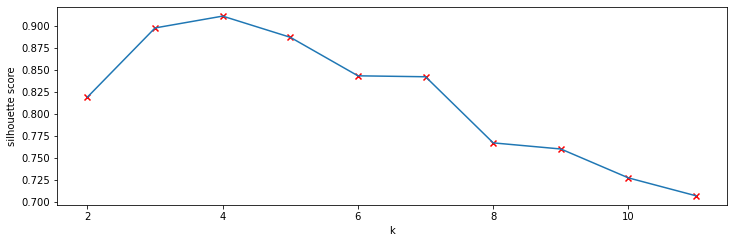

In [13]:
plt.figure(figsize=(12, 8))
plt.subplot(211)
plt.scatter(ks, silhouettes, marker='x', c='r')
plt.plot(ks, silhouettes)
plt.xlabel('k')
plt.ylabel('silhouette score')

In [15]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)
model.fit(dataset)
labels = model.predict(dataset)
import numpy as np
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3]), array([4288, 2334,  365,   63], dtype=int64))

In [17]:
dataset['labels'] = labels
dataset['labels'].value_counts()

0    4288
1    2334
2     365
3      63
Name: labels, dtype: int64

In [19]:
group_zero = dataset[dataset['labels'] == 0]['num_comments'].mean()
group_zero

0.000761956653132618

In [20]:
group_one = dataset[dataset['labels'] == 1]['num_comments'].mean()
group_one

0.03060877318248011

In [21]:
group_two = dataset[dataset['labels'] == 2]['num_comments'].mean()
group_two

0.0017264581307471897

In [22]:
group_three = dataset[dataset['labels'] == 3]['num_comments'].mean()
group_three

0.00027148226290675087

In [23]:
group_zero = dataset[dataset['labels'] == 0]['num_shares'].mean()
group_zero

0.0007458736181824647

In [24]:
group_one = dataset[dataset['labels'] == 1]['num_shares'].mean()
group_one

0.033785031713235485

In [27]:
dataset.groupby(['labels', 'status_type', ])['status_type_status'].count()

KeyError: 'status_type'

In [26]:
dataset

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video,labels
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0.0,0.0,1.0,1
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0.0,0.0,1.0,1
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0
7046,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0,0.0,1.0,0.0,0.0,0
7047,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0
7048,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0
